In [1]:
#fisher matrix , 信烁
import numpy as np
import scipy.interpolate
from scipy import interpolate
import math
import matplotlib.pyplot as plt
import subprocess
from astropy.io import fits
from subprocess import Popen, PIPE
from mpl_toolkits.mplot3d import axes3d
from numpy import cos,sin
import h5py
import json
from KRZmetric import *

%matplotlib inline

In [2]:
#Observation angle, will be used to transform hbar to hTT 
PHI=0/180*np.pi  #azimuthal angle, in rad
THETA=45/180*np.pi  #latitude angle, in rad

In [10]:
tmpgrid=20
spin=0.5
d1=0
e=0.4
p=5
filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p)

In [7]:
t,mydata=getwave(filename,THETA,PHI)

In [8]:
dt=t[1]-t[0]

In [9]:
bracket(mydata,mydata,dt)

0.072536162981704205

In [13]:

f=h5py.File("test.hdf5","r+")
kerrbank=f['Kerr']
maxMatch=0
fillfac=np.zeros((tmpgrid,tmpgrid))
egrid=np.zeros((tmpgrid,tmpgrid))
pgrid=np.zeros((tmpgrid,tmpgrid))

for tmpnum in np.arange(tmpgrid*tmpgrid):
    tmpname='tmp%d'%(tmpnum+1)
    egrid[int(tmpnum/20),tmpnum%20]=kerrbank[tmpname].attrs['e']
    pgrid[int(tmpnum/20),tmpnum%20]=kerrbank[tmpname].attrs['p']
    
    print(tmpname+": e=%.6f, p=%.6f "%(kerrbank[tmpname].attrs["e"],kerrbank[tmpname].attrs["p"]))
    testtmp=kerrbank[tmpname]
    overlap=bracket(testtmp,mydata,dt)/np.sqrt(bracket(mydata,mydata,dt)*bracket(testtmp,testtmp,dt))
    fillfac[int(tmpnum/20),tmpnum%20]=overlap
    if overlap>maxMatch:
        maxMatch=overlap
        besttmp=testtmp
        besttmpname=tmpname
        for i in kerrbank[tmpname].attrs:
            print(i+": %f"%(kerrbank[tmpname].attrs[i]))
    print('FF[%d,%d]=%f'%(int(tmpnum/20),tmpnum%20,fillfac[int(tmpnum/20),tmpnum%20]))



f.close()

tmp1: e=0.400000, p=5.000000 
e: 0.400000
p: 5.000000
r0: 8.333333
spin: 0.500000
t0: 0.000000
phi0: 0.000000
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
FF[0,0]=1.000000
tmp2: e=0.400000, p=5.100000 
FF[0,1]=0.016186
tmp3: e=0.400000, p=5.200000 
FF[0,2]=0.004401
tmp4: e=0.400000, p=5.300000 
FF[0,3]=0.011766
tmp5: e=0.400000, p=5.400000 
FF[0,4]=0.008035
tmp6: e=0.400000, p=5.500000 


KeyboardInterrupt: 

In [24]:
np.savetxt('fillfac.dat',fillfac,fmt='%f',delimiter=' ',newline='\r\n')
np.savetxt('egrid.txt',egrid,fmt='%f',delimiter=' ',newline='\r\n')
np.savetxt('pgrid.txt',pgrid,fmt='%f',delimiter=' ',newline='\r\n')

In [12]:
spin=0.5
d1=0
e=0.408
p=6.48
filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p)
t,h1=getwave(filename,THETA,PHI)

spin=0.5
d1=0.2
e=0.5
p=6
filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p)
t2,h2=getwave(filename,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


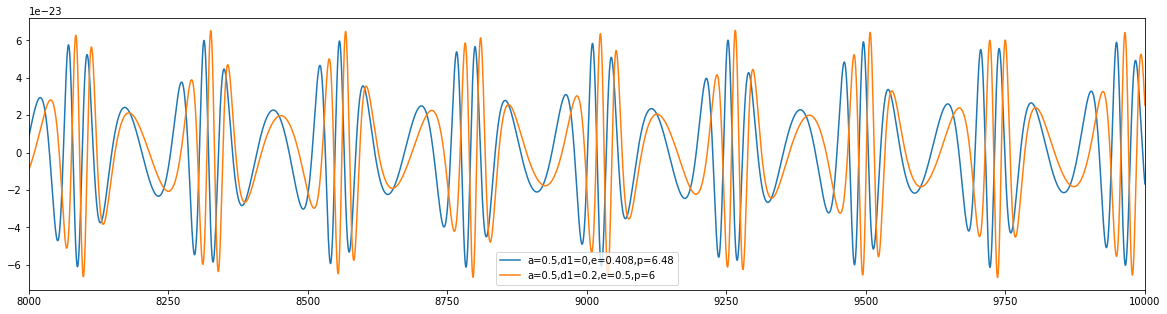

In [21]:
fig=plt.figure()
fig.set_size_inches(20, 5)
plt.xlim(8000,10000)
#plt.ylim(-1,1)
plt.plot(t,h1,label='a=0.5,d1=0,e=0.408,p=6.48')
plt.plot(t2,h2,label='a=0.5,d1=0.2,e=0.5,p=6')
plt.legend()

In [22]:
dt=t[1]-t[0]
bracket(h1,h2,dt)/np.sqrt(bracket(h1,h1,dt)*bracket(h2,h2,dt))

0.64664577896583764